In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from ipywidgets import interact

%matplotlib inline

## Looking at GDP and percent of income held by the top 10 percent per country.

In [2]:
gdp_int_and_income = pd.read_csv('../data/gdp_int_and_income.csv')

gdp_int_and_income.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Income_Share_Top_10_Pct
0,Albania,2014,11623.866679,Europe,60.100000,25.5
1,Albania,2012,11263.851342,Europe,54.655959,22.9
2,Albania,2008,9944.233283,Europe,23.860000,24.5
3,Albania,2005,8066.557445,Europe,6.043891,24.3
4,Albania,2002,6776.106767,Europe,0.390081,25.4


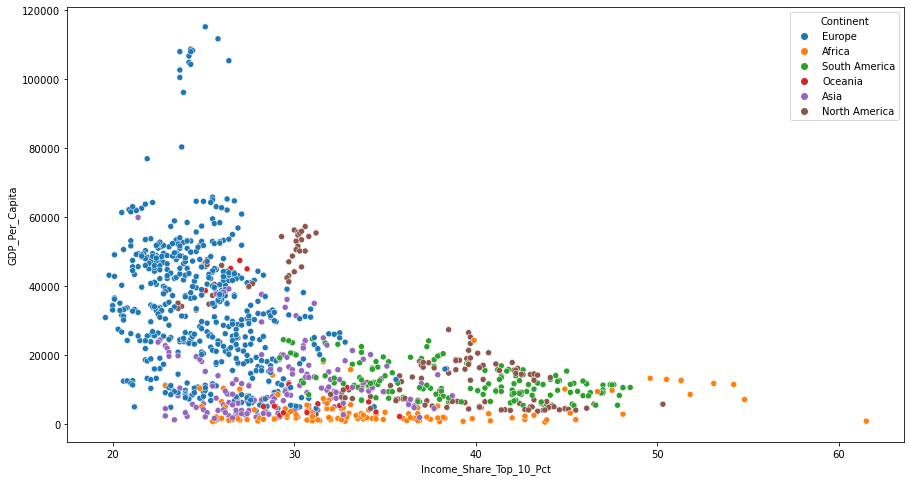

In [3]:
plt.figure(figsize=(15,8))

sns.scatterplot(data = gdp_int_and_income,
               x = 'Income_Share_Top_10_Pct',
               y = 'GDP_Per_Capita',
               hue = 'Continent');

### May have a weak negative relationship between GDP Per Capita and Income Share of Top 10 Percent.

In [4]:
gdp_int_and_income.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,Income_Share_Top_10_Pct
Year,1.000000,0.178472,0.623680,-0.217101
GDP_Per_Capita,0.178472,1.000000,0.740786,-0.504089
Internet_Users_Pct,0.623680,0.740786,1.000000,-0.492828
Income_Share_Top_10_Pct,-0.217101,-0.504089,-0.492828,1.000000


### Correlation of -0.504 between GDP Per Capita and Income Share of Top 10 Percent.

## Looking at top 3 countries in 2014 for Income Share of Top 10 Percent.

In [5]:
gdp_int_and_income_2014 = gdp_int_and_income[gdp_int_and_income['Year'] == 2014]

gdp_int_and_income_2014.sort_values('Income_Share_Top_10_Pct',
                                    ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Income_Share_Top_10_Pct
936,South Africa,2014,12884.484598,Africa,49.00,50.5
723,Mozambique,2014,1217.090210,Africa,5.94,45.5
212,Colombia,2014,13899.368829,South America,52.57,41.4


## Making Facet Grid line plots to view the history of the top 3 countries.

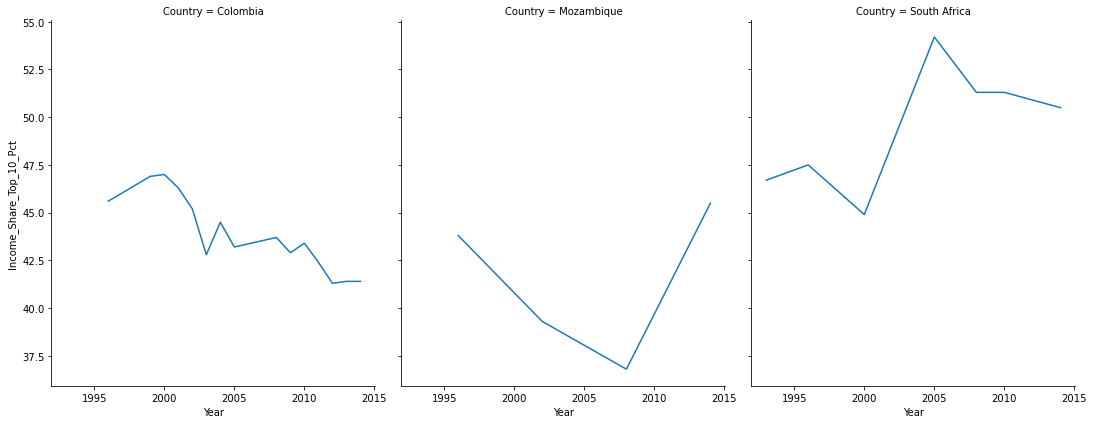

In [6]:
top_income_2014 = gdp_int_and_income_2014.sort_values('Income_Share_Top_10_Pct',
                                                      ascending = False).head(3)['Country']

g = sns.FacetGrid(gdp_int_and_income[gdp_int_and_income['Country'].isin(top_income_2014)],
                  col = 'Country',
                  height = 6,
                  aspect = .85)

g.map(sns.lineplot, "Year","Income_Share_Top_10_Pct");

## Reading in data on the GINI Index.
### For more info on GINI Index check here: https://en.wikipedia.org/wiki/Gini_coefficient

In [7]:
gdp_int_and_income_gini = pd.read_csv('../data/gdp_int_and_income_gini.csv')

gdp_int_and_income_gini.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Income_Share_Top_10_Pct,gini_index
0,Albania,2014,11623.866679,Europe,60.100000,25.5,34.6
1,Albania,2012,11263.851342,Europe,54.655959,22.9,29.0
2,Albania,2008,9944.233283,Europe,23.860000,24.5,30.0
3,Albania,2005,8066.557445,Europe,6.043891,24.3,30.6
4,Albania,2002,6776.106767,Europe,0.390081,25.4,31.7


## Checking to see how the GINI Index measures up with Income Share of Top 10 Percent data.

### The same three countries are on top in 2014 when using GINI Index.

In [8]:
gdp_int_and_income_gini_2014 = gdp_int_and_income_gini[gdp_int_and_income_gini['Year'] == 2014]

top_gini_2014 = gdp_int_and_income_gini_2014.sort_values('Income_Share_Top_10_Pct',
                                                         ascending = False).head(3)

top_gini_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Income_Share_Top_10_Pct,gini_index
936,South Africa,2014,12884.484598,Africa,49.00,50.5,63.0
723,Mozambique,2014,1217.090210,Africa,5.94,45.5,54.0
212,Colombia,2014,13899.368829,South America,52.57,41.4,52.6


## Plotting GINI Index and Income Share of Top 10 Percent to see if they match up across entire timeframe.

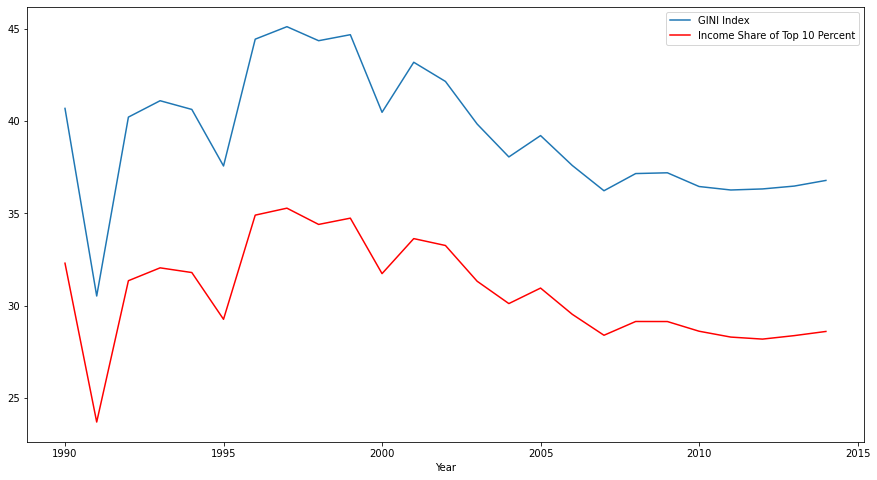

In [9]:
gini_years = gdp_int_and_income_gini.groupby('Year').mean()

gini_years_gini = gini_years['gini_index']

gini_years_income = gini_years['Income_Share_Top_10_Pct']

plt.figure(figsize = (15,8))
ax = plt.gca()

gini_years_gini.plot(kind = 'line',
                     ax = ax)
gini_years_income.plot(kind = 'line',
                       color = 'red',
                       ax = ax)

plt.legend(['GINI Index', 'Income Share of Top 10 Percent']);

## Getting the mean for each variable by continent.

In [10]:
gini_mean_by_continent = gdp_int_and_income_gini.groupby('Continent').mean()

gini_mean_by_continent

,Year,GDP_Per_Capita,Internet_Users_Pct,Income_Share_Top_10_Pct,gini_index
Continent,,,,,
Africa,2004.875969,4139.413399,5.565988,34.548062,43.131783
Asia,2005.112500,11828.378557,16.562797,29.103750,36.827500
Europe,2006.667925,34337.035368,49.406939,25.039434,31.875283
North America,2003.482993,19612.365480,21.459679,36.673469,47.790476
Oceania,2006.550000,14443.968067,21.294810,29.885000,38.350000
South America,2004.384615,12339.629451,19.228012,39.300000,50.817949


## Building a boxplot of each variable using IPywidgets.

In [11]:
@interact(y = ['GDP_Per_Capita', 'Internet_Users_Pct',
       'Income_Share_Top_10_Pct', 'gini_index'])
def make_box(y):
   plt.figure(figsize=(15,8)) 
   sns.boxplot(data = gdp_int_and_income_gini, x = 'Continent', y = y);

interactive(children=(Dropdown(description='y', options=('GDP_Per_Capita', 'Internet_Users_Pct', 'Income_Share…

## Looking at the change in GINI Index over time.

In [12]:
first_last = gdp_int_and_income_gini[gdp_int_and_income_gini['Year'].isin([1990, 2014])]

first_last.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Income_Share_Top_10_Pct,gini_index
0,Albania,2014,11623.866679,Europe,60.10,25.5,34.6
10,Argentina,2014,23550.099061,South America,64.70,29.9,41.6
33,Armenia,2014,11019.838785,Europe,46.30,25.7,31.5
48,Australia,2014,47436.748390,Oceania,84.56,27.0,34.4
53,Austria,2014,53025.847608,Europe,81.00,24.1,30.5


In [13]:
gini_pivot = pd.pivot_table(first_last,
                           index = 'Country',
                           columns = 'Year',
                           values = 'gini_index').dropna()

gini_pivot

Year,1990,2014
Country,,
Brazil,60.5,52.1
China,32.2,39.2
Costa Rica,45.3,48.6
Honduras,57.4,50.3
Indonesia,31.2,39.4
Netherlands,31.1,28.6
Paraguay,40.8,50.7
Spain,32.0,36.1
Thailand,45.3,37.0


In [14]:
gini_pivot['gini_pct_change'] = (((gini_pivot[2014] - 
                                   gini_pivot[1990]) / 
                                  gini_pivot[1990]) * 100).round()

gini_pivot

Year,1990,2014,gini_pct_change
Country,,,
Brazil,60.5,52.1,-14.0
China,32.2,39.2,22.0
Costa Rica,45.3,48.6,7.0
Honduras,57.4,50.3,-12.0
Indonesia,31.2,39.4,26.0
Netherlands,31.1,28.6,-8.0
Paraguay,40.8,50.7,24.0
Spain,32.0,36.1,13.0
Thailand,45.3,37.0,-18.0


### The country with the highest positive percent change between 1990 and 2014:

In [15]:
gini_pivot[gini_pivot['gini_pct_change'] == gini_pivot['gini_pct_change'].max()]

Year,1990,2014,gini_pct_change
Country,,,
Indonesia,31.2,39.4,26.0


### The country with the highest negative percent change between 1990 and 2014:

In [16]:
gini_pivot[gini_pivot['gini_pct_change'] == gini_pivot['gini_pct_change'].min()]

Year,1990,2014,gini_pct_change
Country,,,
Thailand,45.3,37.0,-18.0


## Plotting the change of both countries

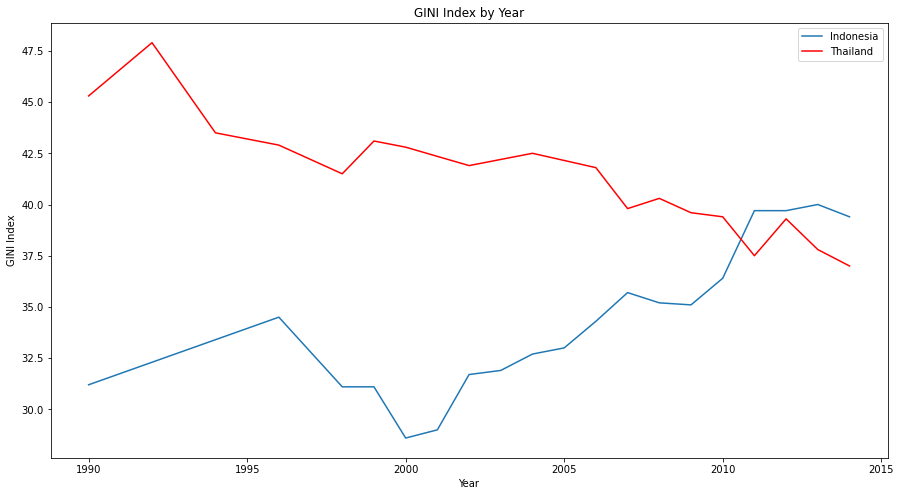

In [17]:
gini_indonesia = gdp_int_and_income_gini[gdp_int_and_income_gini['Country'] == 'Indonesia']
gini_thailand = gdp_int_and_income_gini[gdp_int_and_income_gini['Country'] == 'Thailand']

plt.figure(figsize = (15,8))
ax = plt.gca()

gini_indonesia.plot(kind='line',x='Year',y='gini_index',ax=ax)
gini_thailand.plot(kind='line',x='Year',y='gini_index', color='red', ax=ax)

plt.legend(['Indonesia', 'Thailand'])
plt.title('GINI Index by Year')
plt.ylabel('GINI Index');

### Where is the U.S?

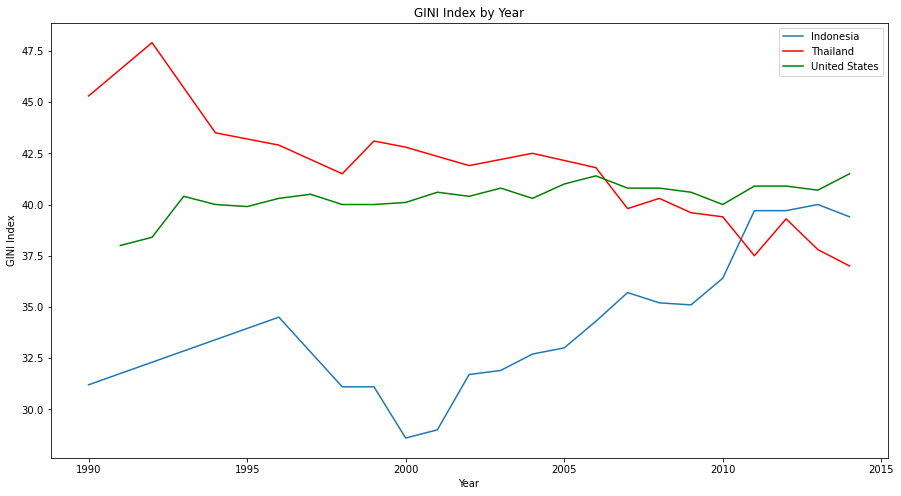

In [18]:
us_gini = gdp_int_and_income_gini[gdp_int_and_income_gini['Country'] == 'United States']

plt.figure(figsize = (15,8))
ax = plt.gca()

gini_indonesia.plot(kind='line',x='Year',y='gini_index',ax=ax)
gini_thailand.plot(kind='line',x='Year',y='gini_index', color='red', ax=ax)
us_gini.plot(kind='line',x='Year',y='gini_index', color = 'green', ax=ax)

plt.legend(['Indonesia', 'Thailand', 'United States'])
plt.title('GINI Index by Year')
plt.ylabel('GINI Index');